In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as png

In [21]:
# load data for semiotics and linguistics seperately

df_sem_raw = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Lexical-decision/2021/semiotics_2021_raw.csv")
df_ling_raw = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Lexical-decision/2021/linguistics_2021_raw.csv")

In [22]:
# add a "group" column to index semiotics and linguistics data

df_sem_raw = df_sem_raw.assign(group = ['semiotics']*df_sem_raw.shape[0])
df_ling_raw = df_ling_raw.assign(group = ['linguistics']*df_ling_raw.shape[0])

# combine semiotics and linguistics data
df = pd.concat([df_sem_raw, df_ling_raw], ignore_index=True)

In [23]:
# define a function to clean up the data:
# 1. remove unnecessary columns
# 2. add a column indexing whether the answer was correct or incorrect (and make this a string, not a bool)
# 3. remove practice runs

def clean_data(df):
    df_clean = pd.DataFrame(
    {'participantID': df['jatosStudyResultId'],
     'group': df['group'],
     'block': df['block'],
     'condition': df['condition'],
     'stimulus': df['stim'],
     'correct_response': df['correct_response'],
     'response': df['response'],
     'rt': df['response_time']
    })
    
    # add column for correct / incorrect responses
    df_clean['correct_response'] = [x.lower() for x in list(df_clean['correct_response'])]
    correct = list(df_clean['correct_response'] == df_clean['response'])
    correct = ["correct" if x == True else "incorrect" for x in correct]
    df_clean.insert(loc = 6, column = 'correct', value = correct)
    
    
    # remove practice trials
    df_clean = df_clean[df_clean['block'] != 'practice']
    
    return(df_clean)


In [24]:
df = clean_data(df)
df.head()

,participantID,group,block,condition,stimulus,correct_response,correct,response,rt
6,239,semiotics,C,Unrelated,peg-yolk,left,incorrect,right,1543
7,239,semiotics,C,Filler,afraid-scobet,right,correct,right,2268
8,239,semiotics,C,Nonword,villane-towp,right,correct,right,1830
9,239,semiotics,C,Nonword,chorch-steeble,right,incorrect,left,1960
10,239,semiotics,C,Nonword,eas-jood,right,correct,right,1263


In [25]:
df_correct = df[df['correct'] == 'correct']

In [52]:
data = df_correct.groupby(['participantID', 'condition']).mean().reset_index()
#data = data.loc[((data['condition'] == 'Nonword') | (data['condition'] == 'Related'))]
data = data.loc[((data['condition'] == 'Nonword') | (data['condition'] == 'Related') | (data['condition'] == 'Unrelated'))]

<AxesSubplot:xlabel='rt', ylabel='Density'>

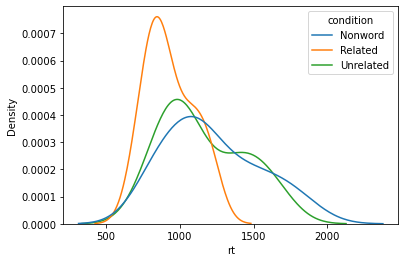

In [53]:
sns.kdeplot(data = data, x = 'rt', hue = 'condition')

In [76]:

pseudoword = np.array(data[data['condition'] == 'Nonword']['rt']) / 2 # divided by two because there were two words
#word = np.array(data[data['condition'] == 'Related']['rt'])
related = np.array(data[data['condition'] == 'Related']['rt']) / 2 # divided by two because there were two words
unrelated = np.array(data[data['condition'] == 'Unrelated']['rt']) / 2 # divided by two because there were two words
words = (unrelated + related) / 2 # to get the mean of related and unrelated
freq_effect = words - pseudoword
freq_effect

array([ -41.72239422, -125.51764706,   21.33333333,  -78.51381579,
       -150.23687424,  -95.95833333,  -44.56527778,  -99.7665107 ,
        -73.46977124,   -6.05799425, -254.57281746,  -51.07269737,
         16.82623225, -221.26468254, -168.70277778, -128.86850894,
        -41.82232542,  -30.27909357,  -63.50710784, -104.56111111,
       -151.20065789,  -39.75622294])

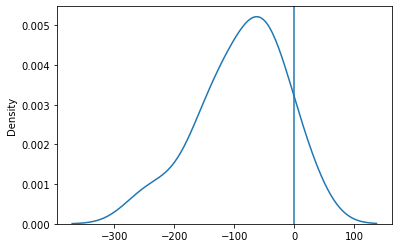

In [77]:
from matplotlib import pyplot as plt
sns.kdeplot(freq_effect)
plt.axvline(0)

In [75]:
np.mean(freq_effect)

-87.87532072242969

In [74]:
np.std(freq_effect)

69.79885990993036